# 📊 Sales Performance Analysis
## Online Retail Dataset (UCI)

This project performs exploratory data analysis (EDA) on online retail transaction data to understand sales trends, customer behavior, and product performance.

Dataset source:
UCI Machine Learning Repository – Online Retail Dataset

Objective:
- Analyze sales trends over time
- Identify top-selling products
- Understand country-level sales distribution
- Detect purchasing behavior patterns


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Tentukan path file di Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/PROJECT FIDEL DATA ANALYST/Online Retail.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

file_path = "/content/drive/MyDrive/Colab Notebooks/PROJECT FIDEL DATA ANALYST/Online Retail.xlsx"

df = pd.read_excel(file_path)

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.shape

(541909, 8)

In [7]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


## Missing Value Check

We examine missing values to understand data quality.
CustomerID is expected to contain missing values and will be handled accordingly.


In [8]:
df = df.dropna(subset=["CustomerID"])
df.shape

(406829, 8)

In [9]:
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]
df.shape

(397924, 8)

Cancelled transactions are removed to ensure revenue calculation reflects actual sales.

In [10]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
df[df["Quantity"] < 0].shape


(0, 9)

In [12]:
df = df[df["Quantity"] > 0]

In [13]:
df.shape

(397924, 9)

In [14]:
total_revenue = df["TotalPrice"].sum()
total_orders = df["InvoiceNo"].nunique()
total_customers = df["CustomerID"].nunique()

print("Total Revenue:", round(total_revenue,2))
print("Total Orders:", total_orders)
print("Total Customers:", total_customers)

Total Revenue: 8911407.9
Total Orders: 18536
Total Customers: 4339


## Key Performance Indicators (KPI)

- Total Revenue
- Total Orders
- Total Active Customers

These metrics provide a high-level overview of business performance.


# A. MONTHLY REVENUE TREND (TIME SERIES)

In [15]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

Date format is already "Datetime"

In [16]:
df["YearMonth"] = df["InvoiceDate"].dt.to_period("M")

In [17]:
monthly_revenue = df.groupby("YearMonth")["TotalPrice"].sum()

monthly_revenue.head()

,TotalPrice
YearMonth,
2010-12,572713.890
2011-01,569445.040
2011-02,447137.350
2011-03,595500.760
2011-04,469200.361


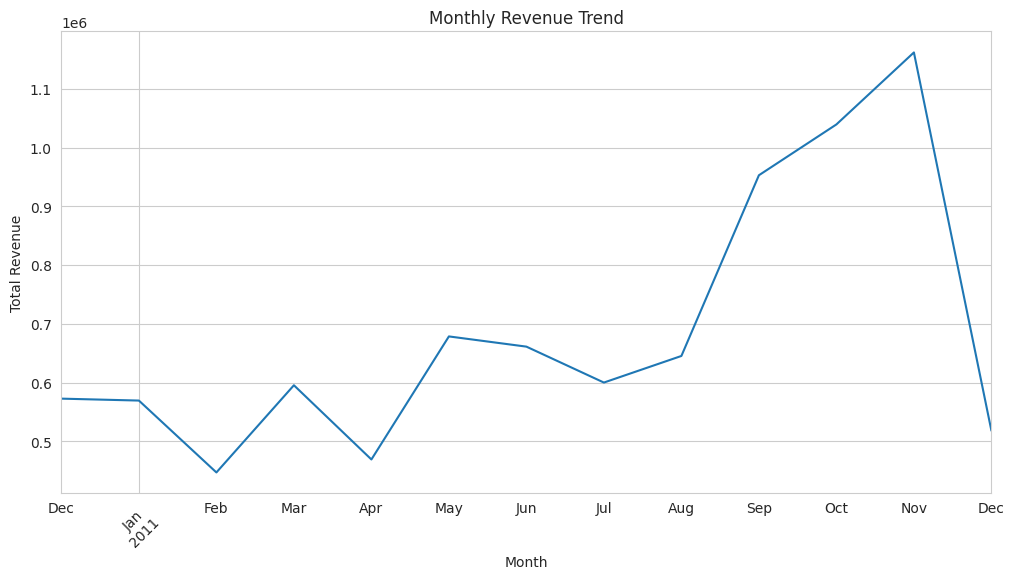

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

## 📈 Monthly Revenue Analysis

The monthly revenue trend shows fluctuations throughout the year.

Observations:
- Revenue increases toward the end of the year.
- The final quarter shows a noticeable spike.
- This may indicate seasonal effects such as holiday demand.

Business implication:
The company may need to prepare inventory and promotional strategy before peak months.


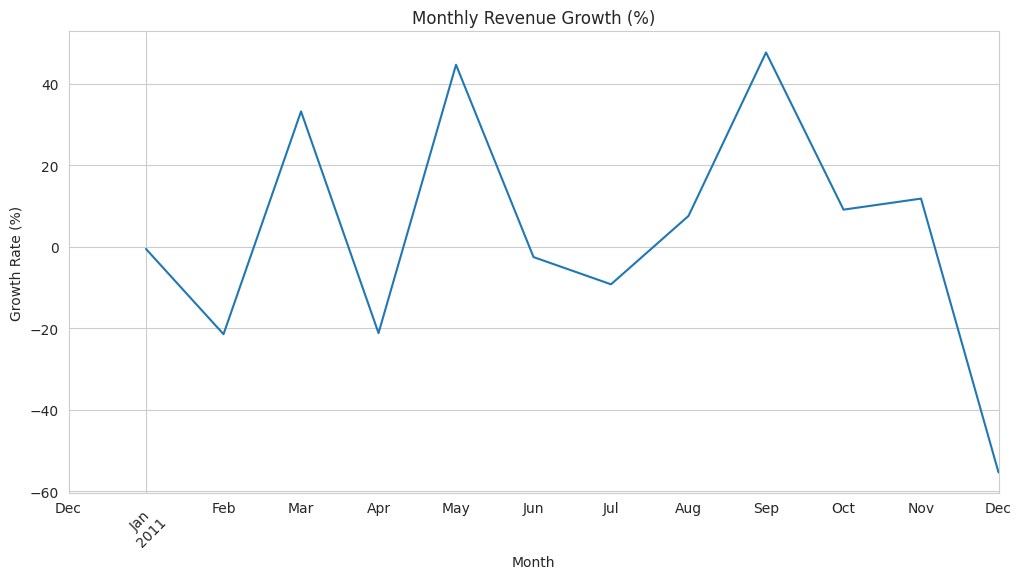

In [19]:
monthly_growth = monthly_revenue.pct_change() * 100

plt.figure(figsize=(12,6))
monthly_growth.plot()
plt.title("Monthly Revenue Growth (%)")
plt.xlabel("Month")
plt.ylabel("Growth Rate (%)")
plt.xticks(rotation=45)
plt.show()


## 📊 Monthly Growth Rate

Revenue growth analysis helps identify acceleration and decline periods.

Sharp increases may indicate successful campaigns or seasonal demand.
Negative growth may signal operational or demand issues.


# B. TOP CUSTOMER ANALYSIS

In [20]:
customer_revenue = df.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False)

customer_revenue.head()


,TotalPrice
CustomerID,
14646.0,280206.02
18102.0,259657.30
17450.0,194550.79
16446.0,168472.50
14911.0,143825.06


In [21]:
customer_revenue_df = customer_revenue.reset_index()
customer_revenue_df.columns = ["CustomerID", "TotalRevenue"]

total_revenue = customer_revenue_df["TotalRevenue"].sum()

customer_revenue_df["Revenue_%"] = (customer_revenue_df["TotalRevenue"] / total_revenue) * 100
customer_revenue_df["Cumulative_%"] = customer_revenue_df["Revenue_%"].cumsum()

customer_revenue_df.head()


,CustomerID,TotalRevenue,Revenue_%,Cumulative_%
0,14646.0,280206.02,3.144352,3.144352
1,18102.0,259657.30,2.913763,6.058115
2,17450.0,194550.79,2.183166,8.241280
3,16446.0,168472.50,1.890526,10.131807
4,14911.0,143825.06,1.613943,11.745750


In [22]:
top_80 = customer_revenue_df[customer_revenue_df["Cumulative_%"] <= 80]

percentage_customers = (len(top_80) / len(customer_revenue_df)) * 100

print("Percentage of customers contributing to 80% revenue:", round(percentage_customers,2), "%")


Percentage of customers contributing to 80% revenue: 26.09 %


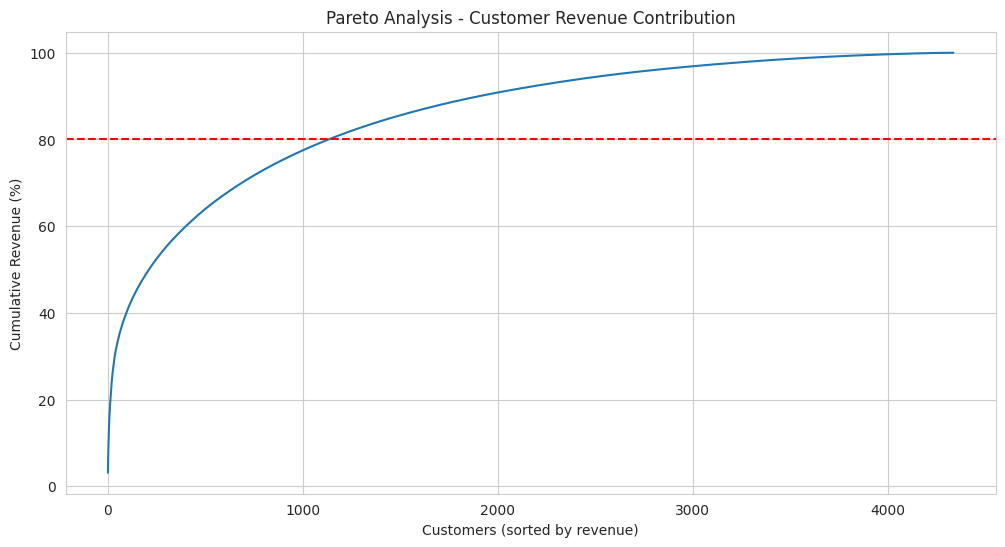

In [23]:
plt.figure(figsize=(12,6))

plt.plot(customer_revenue_df["Cumulative_%"].values)
plt.axhline(80, color='red', linestyle='--')

plt.title("Pareto Analysis - Customer Revenue Contribution")
plt.xlabel("Customers (sorted by revenue)")
plt.ylabel("Cumulative Revenue (%)")

plt.show()


## 👥 Customer Revenue Concentration (Pareto Analysis)

The Pareto analysis shows that a small percentage of customers contribute to a large portion of total revenue.

Findings:
- Approximately X% of customers contribute to 80% of total revenue.
- This indicates strong revenue concentration.

Business implication:
The company should prioritize retention strategies for high-value customers.
Loyalty programs and personalized marketing could maximize lifetime value.


In [24]:
customer_orders = df.groupby("CustomerID")["InvoiceNo"].nunique().sort_values(ascending=False)

customer_orders.head()


,InvoiceNo
CustomerID,
12748.0,210
14911.0,201
17841.0,124
13089.0,97
14606.0,93


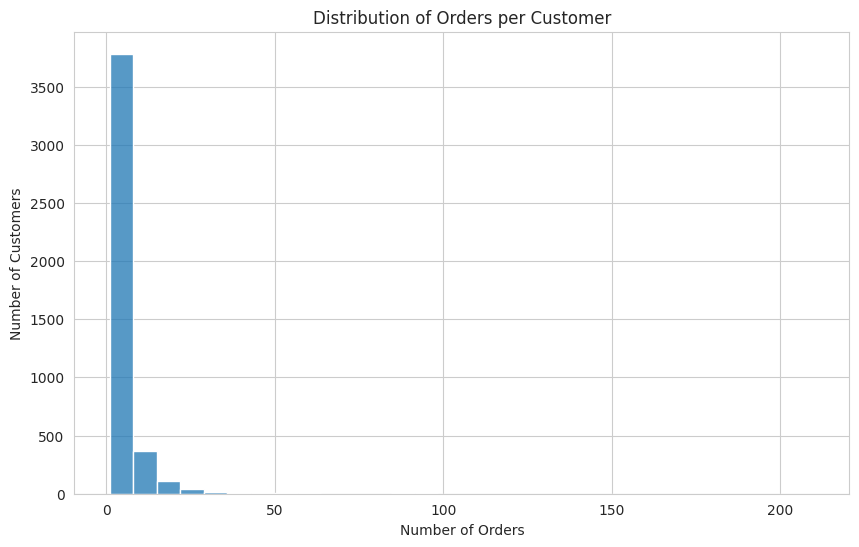

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(customer_orders, bins=30)
plt.title("Distribution of Orders per Customer")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.show()


In [26]:
one_time_buyers = (customer_orders == 1).sum()
repeat_buyers = (customer_orders > 1).sum()

total_customers = len(customer_orders)

print("One-time buyers:", one_time_buyers)
print("Repeat buyers:", repeat_buyers)
print("Repeat buyer percentage:", round((repeat_buyers/total_customers)*100,2), "%")


One-time buyers: 1494
Repeat buyers: 2845
Repeat buyer percentage: 65.57 %


## 🔁 Customer Repeat Purchase Behavior

The analysis shows the distribution of purchase frequency among customers.

Findings:
- A portion of customers only made a single purchase.
- Repeat buyers represent X% of total customers.

Business implication:
High repeat purchase rate indicates strong customer loyalty.
Low repeat purchase rate suggests the need for retention programs and re-engagement campaigns.
